In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pickle
from math import floor

In [270]:
y_test = pd.read_csv('y_test.csv')
x_data_name = "x_test"
x_data_extension = ".csv"
file = open("Selection Methods","rb")
sel_methods = np.load(file)
model_path = "CrimeGUI/Models/"

In [271]:
algorithms = ['decision_tree',
             'elastic_net',
             'lasso',
             'linear_regression',
             'ridge_regression',
             'svm']
algorithm_display_names = ['Decision Tree',
                          'Elastic Net',
                          'Lasso',
                          'Linear Regression',
                          'Ridge Regression',
                          'SVM']
feature_select_display_names = ['F Regression',
                               'Chi2',
                               'Adaboost',
                               'Equal crime \nand business',
                               'All Business']
highest_is_best = {"r2":True,
                  "mse":False,
                  "mae":False}
score_metrics = ["r2","mse","mae"]

In [272]:
def get_algorithm_results(algorithm):
    mse_scores = []
    mae_scores = []
    r2_scores = []
    for sel_method in sel_methods:
        try:
            x_test = pd.read_csv(x_data_name + sel_method + x_data_extension)
            file_path = model_path + algorithm + sel_method
            with open(file_path, 'rb') as f:
                model = pickle.load(f)
                y_predict = model.predict(x_test)
                mse = mean_squared_error(y_test,y_predict)
                mae = mean_absolute_error(y_test,y_predict)
                r2 = r2_score(y_test,y_predict)
                mse_scores.append(mse)
                mae_scores.append(mae)
                r2_scores.append(r2)
        except:
            print("something went wrong for",algorithm+sel_method)
    return mse_scores, mae_scores, r2_scores

In [273]:
results_by_algorithm = {}
all_mse_results = []
all_mae_results = []
all_r2_results = []
for algorithm in algorithms:
    mse_scores, mae_scores, r2_scores = get_algorithm_results(algorithm)
    results_by_algorithm[algorithm] = {'mse':mse_scores,'mae':mae_scores,'r2':r2_scores}
    all_mse_results = all_mse_results + mse_scores
    all_mae_results = all_mae_results + mae_scores
    all_r2_results = all_r2_results + r2_scores
all_results = {'mse':all_mse_results,'mae':all_mae_results,'r2':all_r2_results}

In [274]:
def best_score_per_algorithm(score_metric):
    best_scores = []
    for algorithm in algorithms:
        scores = results_by_algorithm[algorithm][score_metric]
        if highest_is_best[score_metric]:
            best_scores.append(max(scores))
        else:
            best_scores.append(min(scores))
    y_select = np.arange(len(best_scores))
    plt.figure(figsize = (15,15))
    plt.xticks(y_select,algorithm_display_names)
    plt.title("Best " + score_metric + " scores per algorithm")
    plt.xlabel("Algorithm")
    plt.ylabel(score_metric + " score")
    plt.bar(y_select, best_scores)

In [275]:
def get_labels():
    labels = []
    for algorithm in algorithms:
        for sel_method in sel_methods:
            labels.append(algorithm_display_names[algorithms.index(algorithm)] + "\nusing\n" + 
                          feature_select_display_names[np.nonzero(sel_methods == sel_method)[0][0]] + "\ndataset")
    return labels

In [276]:
def validate_x(num_scores,x):
    soft_cap = 15
    if x > num_scores or x < 1:
        if num_scores > soft_cap:
            return soft_cap
        else:
            return num_scores
    return x

In [277]:
def best_x_scores(score_metric,x):
    all_labels = get_labels()
    x_labels = []
    best_scores = []
    scores = all_results[score_metric]
    num_scores = len(scores)
    x = validate_x(num_scores,x)
    num_sel_methods = len(sel_methods)
    i = 0
    while i < x:
        if highest_is_best[score_metric]:
            index = np.argmax(scores)
        else:
            index = np.argmin(scores)
        x_labels.append(all_labels[index])
        best_scores.append(scores[index])
        all_labels = np.delete(all_labels,index)
        scores = np.delete(scores,index)
        i+=1
    y_select = np.arange(len(best_scores))
    plt.figure(figsize = (15,15))
    plt.xticks(y_select,x_labels)
    #plt.xticks(rotation=45)
    plt.title("Top " + str(x) + " " + score_metric + " scores")
    plt.xlabel("Algorithm")
    plt.ylabel(score_metric + " score")
    plt.bar(y_select, best_scores)

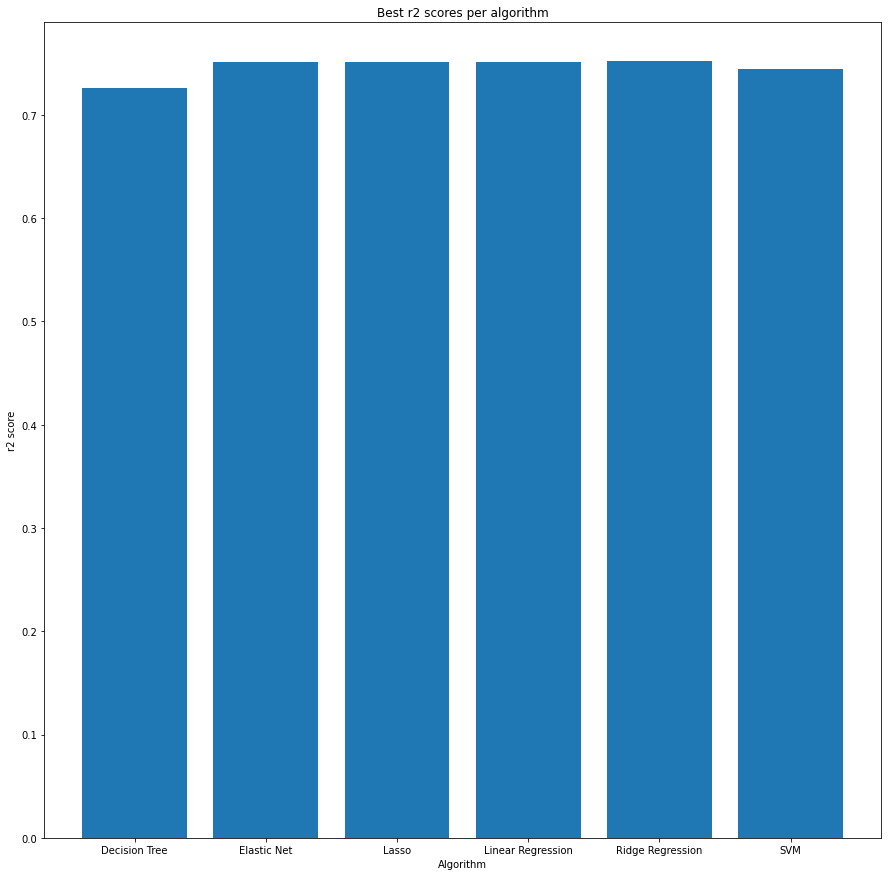

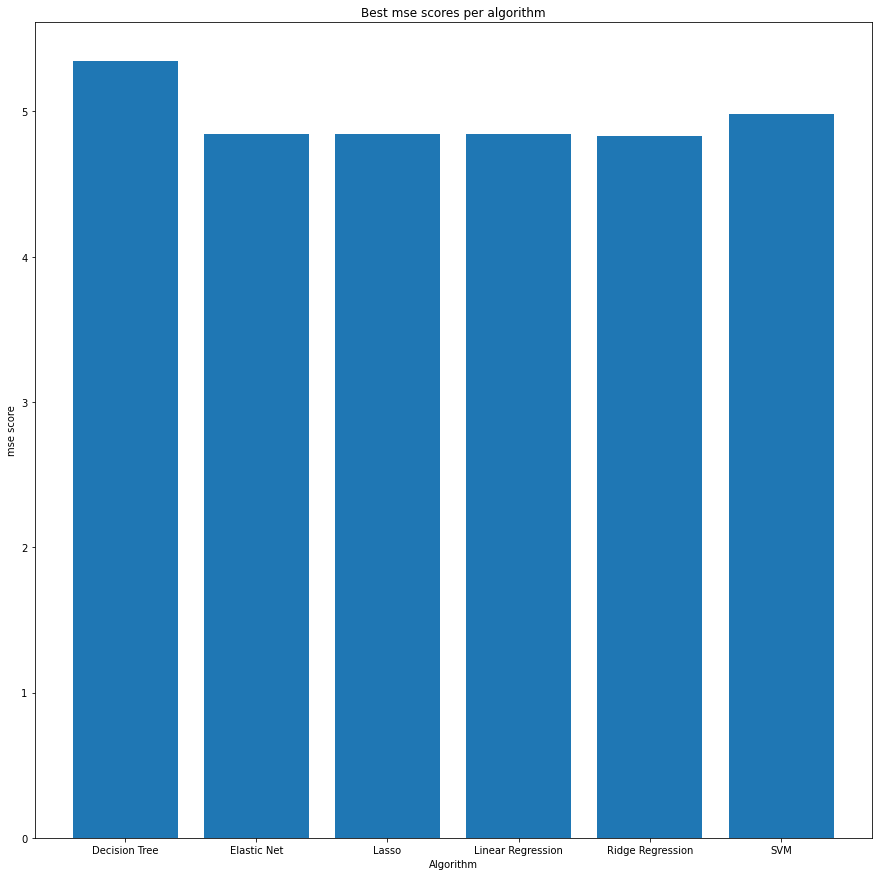

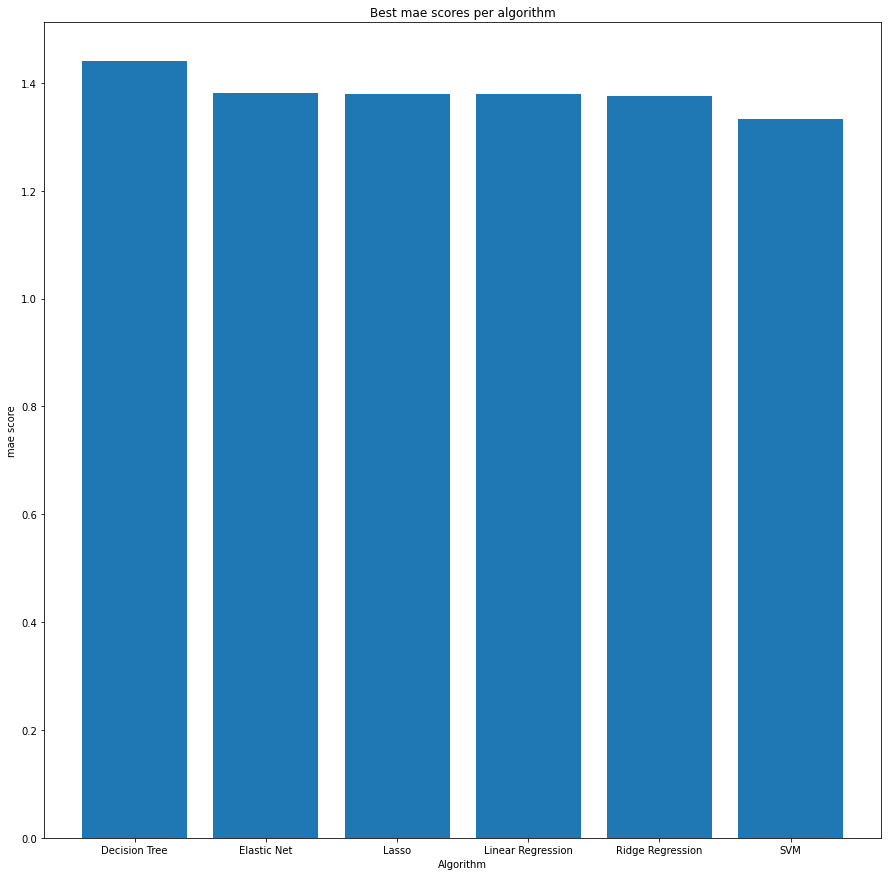

In [278]:
for metric in score_metrics:
    best_score_per_algorithm(metric)

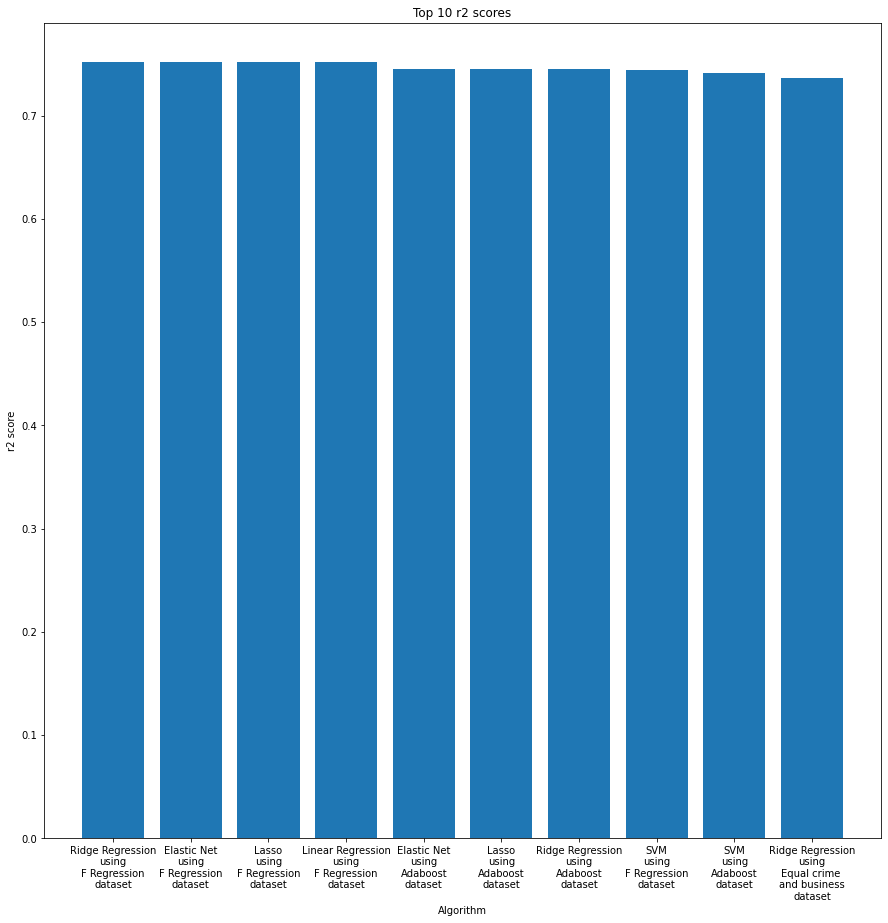

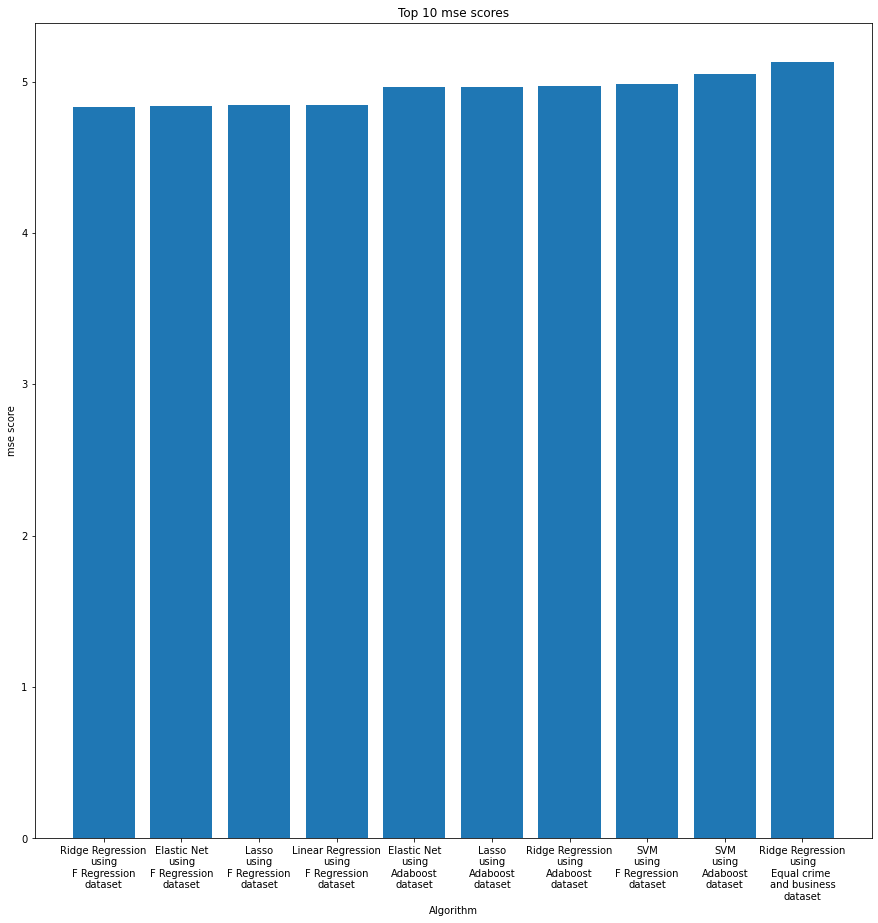

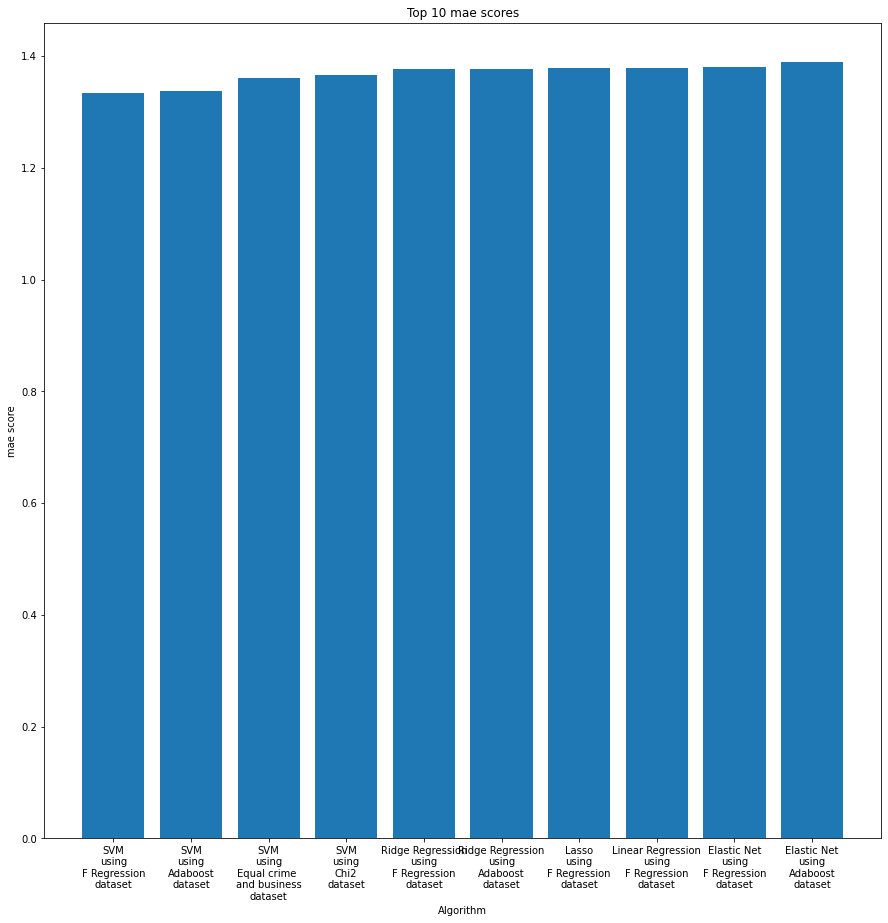

In [279]:
for metric in score_metrics:
    top_x = 10
    best_x_scores(metric,top_x)